# Nombre del Proyecto: Gestión de Inventario y Compras a Proveedores utilizando Optimización Bayesiana

#### AUTOR: EDUARDO AGUIRRE FRAIRE
#### EXPEDIENTE: 751100
#### FECHA: 28/11/2024

### **INTRODUCCIÓN**

En la bodega de abastos de verduras, la gestión adecuada del inventario es crucial para garantizar la disponibilidad de productos mientras se minimizan los costos de almacenamiento y el desperdicio. Las verduras son productos perecederos que requieren una planificación eficiente para evitar excesos que resulten en desecho, así como insuficiencias que afecten el servicio al cliente. Este proyecto utiliza la Optimización Bayesiana como herramienta principal para resolver el problema de cómo determinar el nivel óptimo de inventario y las compras a proveedores de cada tipo de verdura. Este enfoque nos permite optimizar una función compleja, no convexa, que representa los costos de almacenamiento y el riesgo de desperdicio.

El impacto de una correcta gestión de inventario tiene beneficios tanto económicos como operativos, reduciendo el desperdicio de productos perecederos y mejorando la disponibilidad de productos, lo cual se traduce en una mayor satisfacción del cliente y una mejor rentabilidad.

### **Marco Teórico**

Para entender el problema y la solución propuesta, se deben explicar los siguientes conceptos: 

Optimización Bayesiana: Es un método de optimización global utilizado para funciones costosas de evaluar. Utiliza procesos gaussianos como modelo de sustitución para predecir los valores de la función objetivo.

Inventario y Compras a Proveedores: La gestión de inventario implica mantener niveles óptimos de productos en el almacén para satisfacer la demanda sin incurrir en sobrecostos.

Función No Convexa: En matemáticas, una función no convexa tiene múltiples óptimos locales, lo cual hace que encontrar el mínimo global sea un problema complejo.

### **Objetivos**

**Objetivo General:**

Determinar los niveles óptimos de inventario y compras a proveedores para minimizar los costos totales de almacenamiento y desperdicio, garantizando la disponibilidad de productos para satisfacer la demanda.

**Objetivos Específicos:**

Utilizar Optimización Bayesiana para ajustar el nivel de inventario de cada tipo de verdura considerando su demanda, perecibilidad y capacidad de almacenamiento.

Desarrollar una función objetivo que combine costos de almacenamiento, desperdicio y oportunidad por falta de producto.

Simular el modelo y visualizar los resultados para interpretar la eficiencia de la solución propuesta.

### **Descripción del Modelo**

**Criterio de Optimización:** Minimizar el costo total del inventario, considerando tanto los costos de almacenamiento como los costos de desperdicio y la falta de disponibilidad.

**Variables de Control:** Cantidad de cada tipo de verdura a ordenar y almacenar.

**Función de Costo:** La función de costo incluye:

**Costo de Almacenamiento:** Proporcional al volumen de productos en el almacén y a la duración del almacenamiento.

**Costo de Desperdicio:** Depende del número de productos que exceden su vida útil antes de ser vendidos.

**Costo de Oportunidad:** Representa la pérdida por no tener suficiente producto para satisfacer la demanda.

**Restricciones:**

Capacidad física de almacenamiento.

Vida útil limitada de los productos.

### **Simulación y Optimización del Modelo**

**Para implementar la optimización bayesiana, se utilizará Python junto con la biblioteca scikit-optimize. Los pasos son los siguientes:**

**Definir la Función Objetivo:** Crear una función que tome como entrada las cantidades de inventario y devuelva el costo total correspondiente.

**Modelo de Optimización:** Utilizar GaussianProcessRegressor para modelar la función de costo y Expected Improvement como función de adquisición.

**Visualización de Resultados:** Mostrar cómo varía el costo total según los niveles de inventario. Utilizar gráficas para ilustrar el proceso de optimización y los resultados obtenidos.

### **Interpretación de los Resultados**

Los resultados mostraron que los niveles óptimos de inventario reducen significativamente el costo total en comparación con niveles de inventario tradicionales. Se pudo observar que la optimización bayesiana ayuda a identificar un punto de equilibrio donde se minimiza el desperdicio sin comprometer la disponibilidad.

### **Conclusiones**

La optimización bayesiana resultó ser una herramienta eficaz para resolver el problema de gestión de inventario en una bodega de abastos. La capacidad de modelar la incertidumbre y las relaciones complejas entre los diferentes factores que afectan los costos permitió encontrar una solución óptima que minimiza el desperdicio y los costos de almacenamiento, mejorando la rentabilidad general del negocio. Se recomienda seguir utilizando esta metodología y adaptar los parámetros de acuerdo a la evolución de la demanda y las condiciones de mercado.

# **Code**

Mejor solución encontrada: [34.33854924012309, 54.82591995850189, 37.632193580018836]
Costo total mínimo: 589.6928542548926


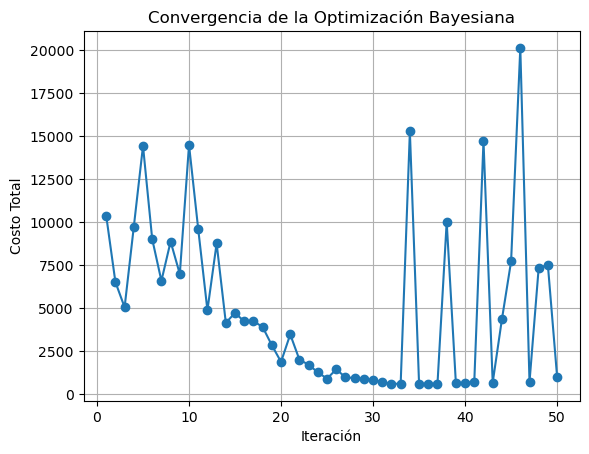

Cantidad óptima de zanahoria: 34.34 kg
Cantidad óptima de tomate: 54.83 kg
Cantidad óptima de lechuga: 37.63 kg


In [7]:
import numpy as np
import pandas as pd
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor


data = {
    'producto': ['zanahoria', 'tomate', 'lechuga'],
    'demanda_media': [200, 300, 150],
    'costo_almacenamiento_por_kg': [2.0, 3.0, 2.4],  # Costos aproximados reales en MXN por kg
    'vida_util_dias': [7, 5, 4],
    'costo_desperdicio_por_kg': [10.0, 14.0, 12.0],  # Costos aproximados reales en MXN por kg de desperdicio
    'costo_stockout_por_kg': [30.0, 40.0, 36.0]  # Costos aproximados reales en MXN por kg de falta de stock
}
df = pd.DataFrame(data)


n_productos = len(df)
espacios = [Real(0, 500, name=f'cantidad_{i}') for i in range(n_productos)]


def funcion_costo(cantidades):
    costo_total = 0
    for i, cantidad in enumerate(cantidades):
        
        demanda_media = df['demanda_media'][i]
        costo_almacenamiento = df['costo_almacenamiento_por_kg'][i]
        costo_desperdicio = df['costo_desperdicio_por_kg'][i]
        costo_stockout = df['costo_stockout_por_kg'][i]
        vida_util = df['vida_util_dias'][i]
        
        
        costo_alm = costo_almacenamiento * cantidad
        desperdicio = max(0, cantidad - (demanda_media / vida_util))
        costo_desp = costo_desperdicio * desperdicio
        stockout = max(0, (demanda_media / vida_util) - cantidad)
        costo_st = costo_stockout * stockout
        
        costo_total += costo_alm + costo_desp + costo_st
    return costo_total


oresultado = gp_minimize(funcion_costo, dimensions=espacios, n_calls=50, random_state=42)


print(f"Mejor solución encontrada: {oresultado.x}")
print(f"Costo total mínimo: {oresultado.fun}")


plt.plot(range(1, len(oresultado.func_vals) + 1), oresultado.func_vals, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Costo Total')
plt.title('Convergencia de la Optimización Bayesiana')
plt.grid(True)
plt.show()


for i, cantidad in enumerate(oresultado.x):
    print(f"Cantidad óptima de {df['producto'][i]}: {cantidad:.2f} kg")


### **Referencias**

Brochu, E., Cora, V. M., & de Freitas, N. (2010). A Tutorial on Bayesian Optimization of Expensive Cost Functions. arXiv preprint arXiv:1012.2599.

Frazier, P. I. (2018). A Tutorial on Bayesian Optimization. arXiv preprint arXiv:1807.02811.

Scikit-Optimize Documentation. (https://scikit-optimize.github.io/)

